# Movimento retilíneo uniforme

Este notebook simula um problema simples de formulação de um problema inverso linear. Ele é baseado no ajuste de dados que simulam o movimento de um corpo com velocidade constante, cuja posição é registrada ao longo de um intervalo de tempo. Consideramos que nenhuma outra força atua sobre o corpo e sua trajetória é sobre uma reta. Neste notebook iremos estimar a posição inicial e a velocidade do corpo.  

A equação do movimento uniforme é igual a :

$$ S (t) = S_0 + Vt $$

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gerando os pontos nos quais as medidas das posições são efetuadas 

In [20]:
t = np.linspace(0.,10.,num=200) # em segundos

In [21]:
t

array([ 0.        ,  0.05025126,  0.10050251,  0.15075377,  0.20100503,
        0.25125628,  0.30150754,  0.35175879,  0.40201005,  0.45226131,
        0.50251256,  0.55276382,  0.60301508,  0.65326633,  0.70351759,
        0.75376884,  0.8040201 ,  0.85427136,  0.90452261,  0.95477387,
        1.00502513,  1.05527638,  1.10552764,  1.15577889,  1.20603015,
        1.25628141,  1.30653266,  1.35678392,  1.40703518,  1.45728643,
        1.50753769,  1.55778894,  1.6080402 ,  1.65829146,  1.70854271,
        1.75879397,  1.80904523,  1.85929648,  1.90954774,  1.95979899,
        2.01005025,  2.06030151,  2.11055276,  2.16080402,  2.21105528,
        2.26130653,  2.31155779,  2.36180905,  2.4120603 ,  2.46231156,
        2.51256281,  2.56281407,  2.61306533,  2.66331658,  2.71356784,
        2.7638191 ,  2.81407035,  2.86432161,  2.91457286,  2.96482412,
        3.01507538,  3.06532663,  3.11557789,  3.16582915,  3.2160804 ,
        3.26633166,  3.31658291,  3.36683417,  3.41708543,  3.46

## Posição inicial e a Velocidade do corpo verdadeiros

In [22]:
S0 = 10. # em metros

In [23]:
V = 50. # em metros por segundo

In [24]:
p_true = np.array([S0,V])

### Cálculo das posições verdadeiras segunda a equação horária

In [25]:
S = S0 + V*t

#### Gerando dados observados com ruído

In [26]:
np.random.seed(40)
mu, std = 0.,10.
r = np.random.normal(mu,std,t.size)

In [27]:
S_obs = S + r

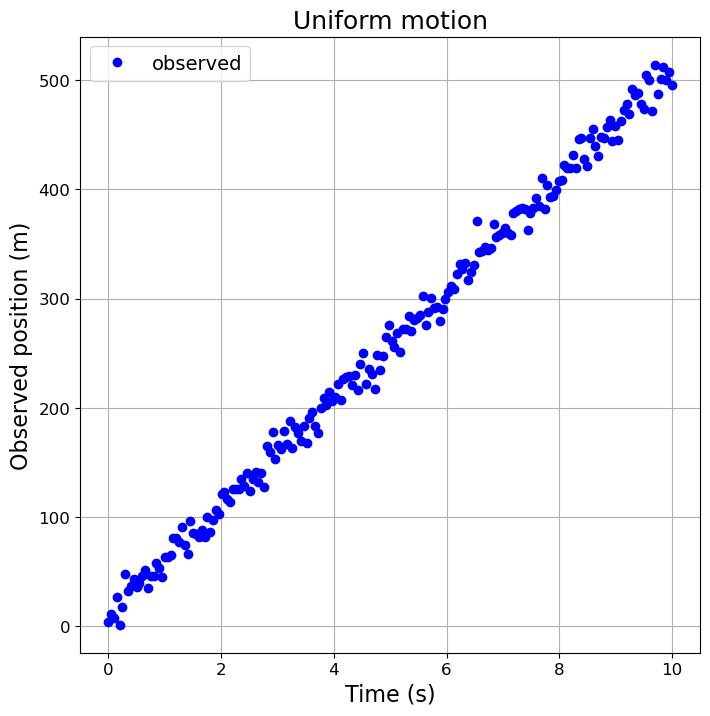

In [28]:
plt.figure(figsize=(8,8))
plt.title('Uniform motion', fontsize=18)
plt.plot(t, S_obs, 'bo', label = 'observed')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()


plt.show()

## Resolvendo o problema inverso

### Matriz de sensibilidade

In [29]:
G = np.empty((t.size,p_true.size))

In [30]:
G[:,0] = np.ones_like(t)
G[:,1] = t

In [31]:
G

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.05025126],
       [ 1.        ,  0.10050251],
       [ 1.        ,  0.15075377],
       [ 1.        ,  0.20100503],
       [ 1.        ,  0.25125628],
       [ 1.        ,  0.30150754],
       [ 1.        ,  0.35175879],
       [ 1.        ,  0.40201005],
       [ 1.        ,  0.45226131],
       [ 1.        ,  0.50251256],
       [ 1.        ,  0.55276382],
       [ 1.        ,  0.60301508],
       [ 1.        ,  0.65326633],
       [ 1.        ,  0.70351759],
       [ 1.        ,  0.75376884],
       [ 1.        ,  0.8040201 ],
       [ 1.        ,  0.85427136],
       [ 1.        ,  0.90452261],
       [ 1.        ,  0.95477387],
       [ 1.        ,  1.00502513],
       [ 1.        ,  1.05527638],
       [ 1.        ,  1.10552764],
       [ 1.        ,  1.15577889],
       [ 1.        ,  1.20603015],
       [ 1.        ,  1.25628141],
       [ 1.        ,  1.30653266],
       [ 1.        ,  1.35678392],
       [ 1.        ,

## Resolvendo o Sistema linear utilizando a norma-L2

In [32]:
def L2_norm(A,d):
    At = A.T
    AtA = np.dot(At,A)
    Atd = np.dot(At,d)
    m = np.linalg.solve(AtA,Atd)
    return m 

In [33]:
p_est = L2_norm(G,S_obs)

In [34]:
S_pred = np.dot(G,p_est)

## Visualizando o resultado

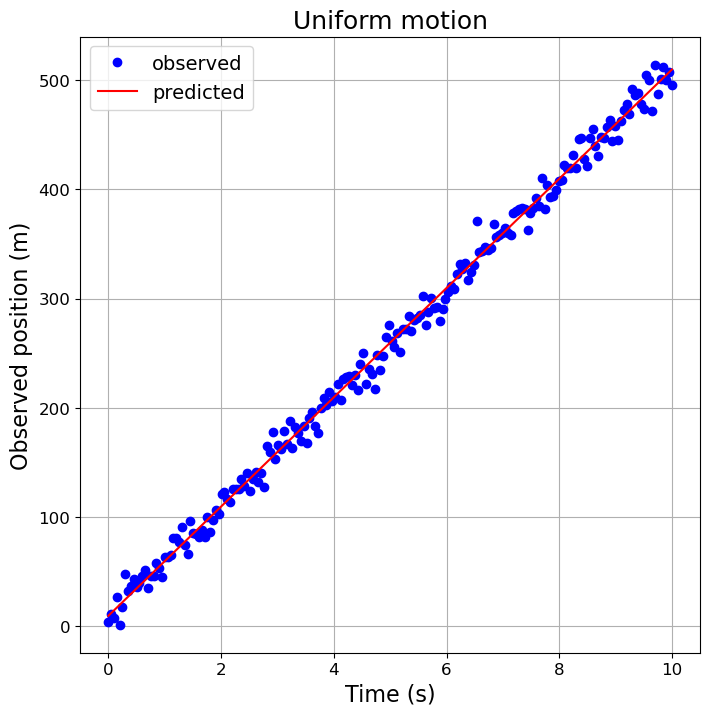

In [35]:
plt.figure(figsize=(8,8))
plt.title('Uniform motion', fontsize=18)
plt.plot(t, S_obs, 'bo', label = 'observed')
plt.plot(t, S_pred, 'r-', label = 'predicted')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Time (s)', fontsize = 16)
plt.ylabel('Observed position (m)', fontsize = 16)
plt.grid()
plt.show()

### Comparação entre estimado e verdadeiro

In [36]:
print (p_true)
print (p_est)

[10. 50.]
[ 9.73834233 49.99012954]
